In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
gross_budget = pd.read_csv('../Data/gross_budget.csv')
gross_budget.head()

,Unnamed: 0,foreign_gross,production_budget,net_profit,movie_title,domestic_gross,world_wide_gross_Profit,ROI
0,0,652000000.0,200000000.0,868879522.0,Toy Story 3,415004880.0,1.068880e+09,434.439761
1,3,535700000.0,160000000.0,675524642.0,Inception,292576195.0,8.355246e+08,422.202901
2,4,513900000.0,165000000.0,591244673.0,Shrek Forever After,238736787.0,7.562447e+08,358.330105
3,5,398000000.0,68000000.0,638102828.0,The Twilight Saga: Eclipse,300531751.0,7.061028e+08,938.386512
4,6,311500000.0,170000000.0,451156389.0,Iron Man 2,312433331.0,6.211564e+08,265.386111


In [36]:
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               5234 non-null   int64  
 1   foreign_gross            5234 non-null   float64
 2   production_budget        5234 non-null   float64
 3   net_profit               5234 non-null   float64
 4   movie_title              5234 non-null   object 
 5   domestic_gross           5234 non-null   float64
 6   world_wide_gross_Profit  5234 non-null   float64
 7   ROI                      5234 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 327.2+ KB


In [37]:
gross_budget.shape

(5234, 8)

In [38]:
lowest_ROI = gross_budget['ROI'].min()
lowest_ROI

-99.98745454545454

In [39]:
highest_ROI = gross_budget['ROI'].max()
highest_ROI 

179900.0

In [87]:
ROI_mean_tot = gross_budget['ROI'].mean()
ROI_mean_tot

426.7876499678177

In [41]:
ROI_median = gross_budget['ROI'].median()
ROI_median

96.16530254545454

In [42]:
ROI_mode = gross_budget['ROI'].mode()
ROI_mode

0    260.0
1    800.0
dtype: float64

In [44]:
ROI_std = gross_budget['ROI'].std()
ROI_std

3099.7659381775507

In [29]:
ROI_counts = ROI[['ROI']].value_counts()

ROI_mode_counts.head(20)


 800.000000    3
 260.000000    3
 100.000000    2
-66.666667     2
-80.000000     2
 300.000000    2
-88.842137     2
-99.878200     2
 616.666667    2
 344.444444    2
 483.333333    2
 400.000000    2
 152.298867    1
 687.629816    1
-99.313000     1
 152.272063    1
 95.552450     1
-13.304677     1
-10.303507     1
-94.039069     1
Name: ROI, dtype: int64

In [45]:
mean_pb = gross_budget['production_budget'].mean()
mean_pb

34033480.04948414

In [46]:
median_pb = gross_budget['production_budget'].median()
median_pb

20000000.0

In [51]:
mode_pb = gross_budget['production_budget'].value_counts()
mode_pb.head(20)

20000000.0    221
10000000.0    197
30000000.0    171
40000000.0    163
15000000.0    162
25000000.0    161
5000000.0     134
35000000.0    131
50000000.0    124
60000000.0    109
12000000.0    108
3000000.0      92
1000000.0      89
2000000.0      88
18000000.0     85
4000000.0      78
6000000.0      77
7000000.0      76
8000000.0      75
45000000.0     74
Name: production_budget, dtype: int64

In [57]:
std_pb = gross_budget['production_budget'].std()
std_pb

42960481.08389108

In [62]:
lowest_pb = gross_budget['production_budget'].min()
lowest_pb

1100.0

In [54]:
low_budget_films = gross_budget[gross_budget['production_budget'] < median_pb]
low_budget_films

,Unnamed: 0,foreign_gross,production_budget,net_profit,movie_title,domestic_gross,world_wide_gross_Profit,ROI
10,15,182500000.0,8000000.0,82815558.0,The Karate Kid,90815558.0,90815558.0,1035.194475
11,17,222400000.0,13000000.0,318266710.0,Black Swan,106954678.0,331266710.0,2448.205462
33,41,92800000.0,3000000.0,174512032.0,Paranormal Activity 2,84752907.0,177512032.0,5817.067733
43,53,90400000.0,17000000.0,116735284.0,Saw 3D,45710178.0,133735284.0,686.678141
44,55,35600000.0,11000000.0,118262388.0,The Fighter,93617009.0,129262388.0,1075.112618
...,...,...,...,...,...,...,...,...
5229,7924,1573.0,7000.0,64644.0,Cavite,70071.0,71644.0,923.485714
5230,7925,0.0,7000.0,-6100.0,The Mongol King,900.0,900.0,-87.142857
5231,7927,192013.0,6000.0,234495.0,Following,48482.0,240495.0,3908.250000
5232,7928,0.0,5000.0,-3662.0,Return to the Land of Wonders,1338.0,1338.0,-73.240000


In [55]:
len(low_budget_films)

2587

In [61]:
(2587/5234)*100

49.42682460833015

In [70]:
low_budget_films_avg = low_budget_films['ROI'].mean()
low_budget_films_avg

689.8879844181744

In [78]:
low_budget_films_max = low_budget_films['production_budget'].max()
low_budget_films_max

19700000.0

In [72]:
low_budget_films2 = gross_budget[gross_budget['production_budget'] < mean_pb]
low_budget_films2

,Unnamed: 0,foreign_gross,production_budget,net_profit,movie_title,domestic_gross,world_wide_gross_Profit,ROI
10,15,182500000.0,8000000.0,82815558.0,The Karate Kid,90815558.0,90815558.0,1035.194475
11,17,222400000.0,13000000.0,318266710.0,Black Swan,106954678.0,331266710.0,2448.205462
33,41,92800000.0,3000000.0,174512032.0,Paranormal Activity 2,84752907.0,177512032.0,5817.067733
43,53,90400000.0,17000000.0,116735284.0,Saw 3D,45710178.0,133735284.0,686.678141
44,55,35600000.0,11000000.0,118262388.0,The Fighter,93617009.0,129262388.0,1075.112618
...,...,...,...,...,...,...,...,...
5229,7924,1573.0,7000.0,64644.0,Cavite,70071.0,71644.0,923.485714
5230,7925,0.0,7000.0,-6100.0,The Mongol King,900.0,900.0,-87.142857
5231,7927,192013.0,6000.0,234495.0,Following,48482.0,240495.0,3908.250000
5232,7928,0.0,5000.0,-3662.0,Return to the Land of Wonders,1338.0,1338.0,-73.240000


In [60]:
(3507/5234)*100

67.00420328620558

In [73]:
low_budget_films2_avg = low_budget_films2['ROI'].mean()
low_budget_films2_avg

555.2045466200623

In [80]:
low_budget_films2_max = low_budget_films2['production_budget'].max()
low_budget_films2_max

34000000.0

In [86]:
#percentile_25 = np.percentile(gross_budget['production_budget'], 25)
let
low_budget_films3 = gross_budget[gross_budget['production_budget'] <= percentile_25]
low_budget_films3


,Unnamed: 0,foreign_gross,production_budget,net_profit,movie_title,domestic_gross,world_wide_gross_Profit,ROI
33,41,92800000.0,3000000.0,174512032.0,Paranormal Activity 2,84752907.0,177512032.0,5817.067733
70,89,26700000.0,1800000.0,68365900.0,The Last Exorcism,41034350.0,70165900.0,3798.105556
95,127,13900000.0,4000000.0,32275469.0,The Kids Are All Right,20811365.0,36275469.0,806.886725
112,149,18100000.0,1987650.0,19282640.0,Buried,1044143.0,21270290.0,970.122506
113,150,18500000.0,5600000.0,12927766.0,[Rec] 2,27766.0,18527766.0,230.852964
...,...,...,...,...,...,...,...,...
5229,7924,1573.0,7000.0,64644.0,Cavite,70071.0,71644.0,923.485714
5230,7925,0.0,7000.0,-6100.0,The Mongol King,900.0,900.0,-87.142857
5231,7927,192013.0,6000.0,234495.0,Following,48482.0,240495.0,3908.250000
5232,7928,0.0,5000.0,-3662.0,Return to the Land of Wonders,1338.0,1338.0,-73.240000


In [67]:
(1324/5234)*100

25.296140619029423

In [66]:
low_budget_films3_avg = low_budget_films3['ROI'].mean()
low_budget_films3_avg

1099.2432941425466

In [82]:
low_budget_films3_max = low_budget_films3['production_budget'].max()
low_budget_films3_max

6500000.0

In [91]:
low_budget_films3_std = low_budget_films3['ROI'].std()
low_budget_films3_std

6076.476790361145

# Two Sample T-Test

In [93]:
# All variable for two sample t-test are listed below

# ROI average of for all movies in the data set
ROI_mean_tot

# Standard Deviation for all movies in the data set
ROI_std

data_points1=5234

# ROI average for all low budget movies
low_budget_films3_avg

#Standard Deviation average for all low budget movies
low_budget_films3_std
 
data_points2=1324

alpha=0.5



In [ ]:
scaler.fit(df[['HourlyRate']])

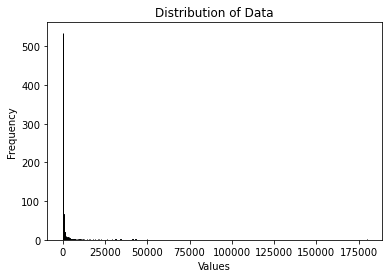

In [107]:
# Extract the data from the specified column
data = low_budget_films3['ROI']

# Plot the distribution using a histogram
plt.hist(data, bins='auto' , edgecolor='black')  # You can adjust the number of bins
plt.title('Distribution of Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


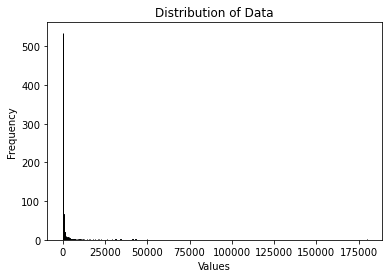

In [110]:
data2 = gross_budget['domestic_gross'] 

plt.hist(data, bins='auto' , edgecolor='black')  # You can adjust the number of bins
plt.title('Distribution of Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()
